In [5]:
import pickle
import geopandas as gpd
import cartopy.crs as crs
import cartopy.feature as cf
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
datadir = '/vortexfs1/home/csherwood/proj/NOPP_Idalia/'

In [6]:
def drift_swhplt(dt1, swh, lat=None, lon=None,inset='left',btype='spot',name=None,hurrpath=None,extent=None):
    import cartopy.crs as crs
    import cartopy.feature as cf
    import matplotlib.pyplot as plt
    cpc = crs.PlateCarree()

    lonx1 = lon
    laty1 = lat
    if extent is not None:
        (x1, x2, y1, y2) = extent[0],extent[1],extent[2],extent[3]

    fig1 = plt.figure()
    ax1 = fig1.add_axes((0.12, 0.125, 0.8, 0.8))
    plt.plot(dt1, swh, color='k', lw=2, zorder=25, label='buoy')
    xtl = ax1.get_xticklabels()
    ax1.set_xticklabels(xtl, size=7)

    if inset == 'left':
        ax2 = fig1.add_axes((0.13, 0.63, 0.3, 0.25), projection=cpc)
    elif inset == 'right':
        ax2 = fig1.add_axes((0.63, 0.53, 0.3, 0.25),projection=cpc)
    elif inset == 'bright':
        ax2 = fig1.add_axes((0.63, 0.03, 0.3, 0.25), projection=cpc)
    else:
        ax2 = fig1.add_axes((0.13, 0.03, 0.3, 0.25), projection=cpc)
    ax2.set_extent([x1,x2,y1,y2])
    # ax2.coastlines(color='lightgray', zorder=-1)
    ax2.scatter(lonx1, laty1, s=5, marker='.', c=dt1, cmap=cm.turbo,zorder=6)
    if hurrpath is not None:
        ax2.plot(hurrpath[:,0],hurrpath[:,1],'*-', markersize=3, linewidth=1, c='gray', zorder=5)
    ax2.add_feature(cf.STATES, edgecolor='lightblue', linewidth=1, zorder=-1)
    ax2.annotate('color is time: blue to red', xy=(0.02, 0.01), xycoords="axes fraction", size=6)
    plt.sca(ax1)
    if 'spot' in btype:
        titlestr = 'Spotter buoy'
    elif 'swift' in btype:
        titlestr = 'microSWIFT buoy'
    elif 'dwsd' in btype:
        titlestr = 'DWSD buoy'
    else:
        titlestr = ''
    if name is not None:
        titlestr = f'{titlestr}: {name}'
    plt.title(titlestr)

    return fig1,ax1,ax2


def drift_clean(df1,time_frame=None):
    """Takes a dataframe as a single argument, and returns the dataframe with NaNs dropped from sig wave height,
    and a datetime64 array to facilitate plotting (via, e.g., drift_swhplt()). The dataframe can
    come from a pandas read of a json or csv file (pd.read_json or pd.read_csv), or from the pickle file
    that Jacob usually sends out after a hurricane has passed."""
    df1a = df1.loc[df1.significant_height.dropna().index]
    dt1 = df1a.index.values
    if time_frame is not None:
        df1b = df1a.loc[(df1a.index > time_frame[0]) & (df1a.index < time_frame[1])]
        dt1 = df1b.index.values
        return dt1, df1b
    return dt1, df1a

def drift_save(df1,time_frame=None):
    """WIP: to save drifter info to a file (csv?, mat?, pickle?)"""
    return None


/tmp/ipykernel_89740/2456834831.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(xtl, size=7)
/tmp/ipykernel_89740/2456834831.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ytl, size=9)


[Text(0, 23.0, '23'),
 Text(0, 24.0, '24'),
 Text(0, 25.0, '25'),
 Text(0, 26.0, '26'),
 Text(0, 27.0, '27'),
 Text(0, 28.0, '28'),
 Text(0, 29.0, '29'),
 Text(0, 30.0, '30'),
 Text(0, 31.0, '31')]

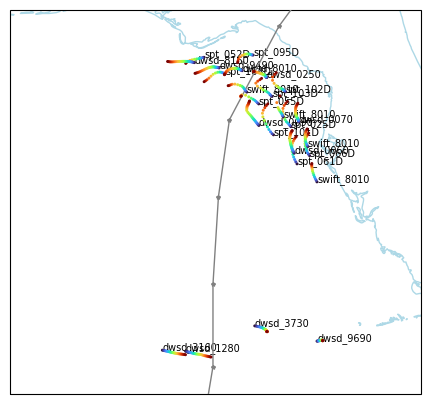

In [7]:
with open(datadir+'hurricane_idalia_drifter_data_v1.pickle', 'rb') as f1:
    spots = pickle.load(f1)

gd1 = gpd.read_file(datadir+'track/AL102023_pts.shp')
lt1 = gd1.LAT
ln1 = gd1.LON
hurpth = np.array(list(zip(ln1,lt1)))

cpc = crs.PlateCarree()

fig1 = plt.figure()
ax1 = fig1.add_axes((0.12, 0.125, 0.8, 0.8),projection=cpc)
ax1.set_extent([-88.5, -81, 23.3, 30.3])
ax1.add_feature(cf.STATES, edgecolor='lightblue', linewidth=1, zorder=-1)

ax1.plot(hurpth[:,0],hurpth[:,1],'*-', markersize=3, linewidth=1, c='gray', zorder=5)

for btype in spots.keys():
    for buoy1 in spots[btype].keys():
        df1 = spots[btype][buoy1]
        dt1, df1a = drift_clean(df1, ("2023-08-29 23:31", "2023-08-30 12:30"))
        ax1.scatter(df1a.longitude, df1a.latitude, s=5, marker='.', c=dt1, cmap=cm.turbo, zorder=6)
        if 'swift' in btype:
            bt2 = 'swift'
        elif 'spot' in btype:
            bt2 = 'spt'
            # This line uses the last four digits of the buoy number to annotate it on the map
            buoy2 = buoy1[-4:]
        elif 'dwsd' in btype:
            bt2 = btype
            # This line uses the last four digits of the buoy number to annotate it on the map
            buoy2 = buoy1[-4:]
        ax1.annotate(f'{bt2}_{buoy2}', xy=(df1a.longitude[0], df1a.latitude[0]), size=7)

xtl = ax1.get_xticklabels()
ax1.set_xticklabels(xtl, size=7)
ytl = ax1.get_yticklabels()
ax1.set_yticklabels(ytl, size=9)